In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
from scipy.special import expit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from sklearn.preprocessing import normalize
from sklearn.metrics import log_loss
from sklearn.datasets import load_digits
from algorithms import *
plt.rcParams['figure.figsize'] = [12, 10]

In [2]:
#Load data and split train and test
digits = load_digits()
X = digits.data
y = convert_labels(digits.target).reshape(len(digits.target),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [3]:
#Train T trials
T = 30
costs0 = 0
costs1 = 0
costs2 = 0
for t in tqdm(range(T)):
    _,_,cost0 = Logistic_Regression_SGD(X_train, y_train, eta=0.000225, K=15000)
    _,_,cost1 = Logistic_Regression_SAG(X_train, y_train, eta=0.000675, K=15000)
    _,_,cost2 = Logistic_Regression_SAGA(X_train, y_train, eta=0.000675, K=15000)
    costs0 += (cost0/T)
    costs1 += (cost1/T)
    costs2 += (cost2/T)

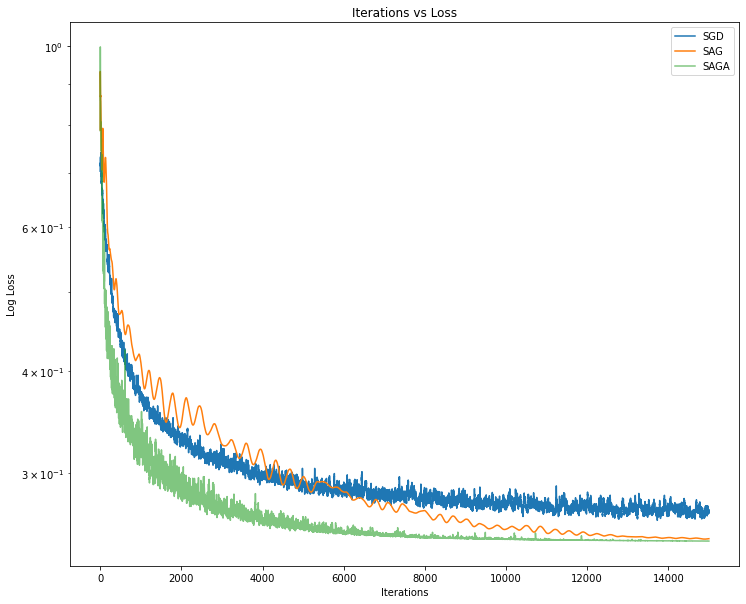

In [4]:
#Plots
plt.plot(np.arange(len(costs0)),np.array(costs0), label="SGD")
plt.plot(np.arange(len(costs1)),np.array(costs1), label="SAG")
plt.plot(np.arange(len(costs2)),np.array(costs2), label="SAGA", alpha=0.6)


plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Iterations vs Loss")
plt.legend()
plt.yscale("log");